In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [64]:
mpl.rc('figure', figsize = (15,15))
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [219]:
import pandas as pd
import numpy as np
import os

DATA_DIR = "data"
salt = 'hackathon-three-cities_'
l1_nrows = 1512
l2_nrows = 1248
n_horizons = 4
y_height = 3001

# Загружаем значения высот в узлах сетки для срезов L1 и L2

all_data_l1 = np.load(os.path.join(DATA_DIR, salt+"all_data_L1.npy"))
all_data_l2 = np.load(os.path.join(DATA_DIR, salt+"all_data_L2.npy"))

assert all_data_l1.shape == (l1_nrows, y_height), "Неправильный размер all_data_L1.npy"
assert all_data_l2.shape == (l2_nrows, y_height), "Неправильный размер all_data_L2.npy"

# Загружаем горизонты

l1_horizons_train = pd.read_csv(os.path.join(DATA_DIR, salt+"L1_horizons_train.csv"))
l2_horizons_train = pd.read_csv(os.path.join(DATA_DIR, salt+"L2_horizons_train.csv"))

assert l1_horizons_train.shape == (l1_nrows, n_horizons+1)
assert l2_horizons_train.shape == (l2_nrows, n_horizons+1)

sample_submission = pd.read_csv(os.path.join(DATA_DIR, "sample_submission.csv"))
my_submission = sample_submission.copy()

In [169]:
all_data_l1 -= all_data_l1.min()

In [196]:
def plot_heights(df, data, key = 'hor_1'):
    tmp = df[df[key].notna()].copy()
    tmp[key] = tmp[key].values.astype(int)
    sl_x = tmp.x.values
    sl_y = tmp[key].astype(int)
    plt.figure(figsize=(15,2))
    plt.plot(np.log(data.T[sl_x, sl_y]))
    return sl_x, sl_y

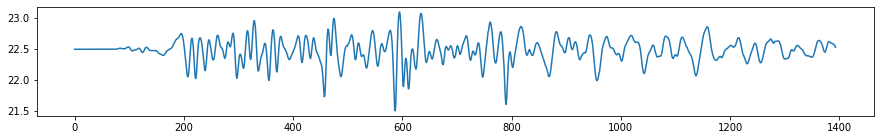

In [192]:
plot_heights(l1_horizons_train, all_data_l1, key='hor_1')

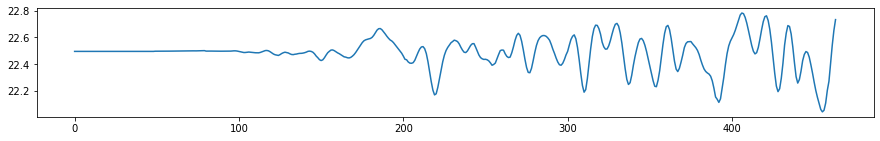

In [197]:
x,y = plot_heights(l1_horizons_train, all_data_l1, key='hor_2')

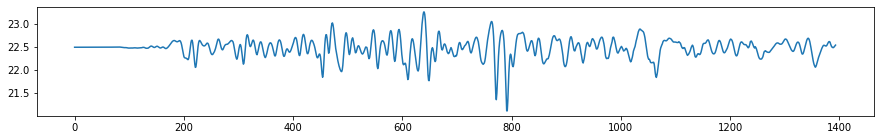

In [194]:
plot_heights(l1_horizons_train, all_data_l1, key='hor_3')

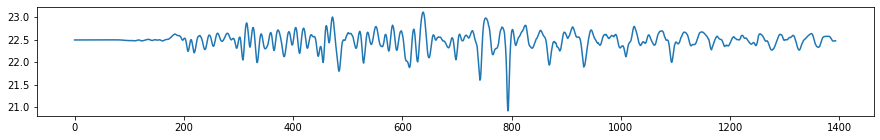

In [195]:
plot_heights(l1_horizons_train, all_data_l1, key='hor_4')

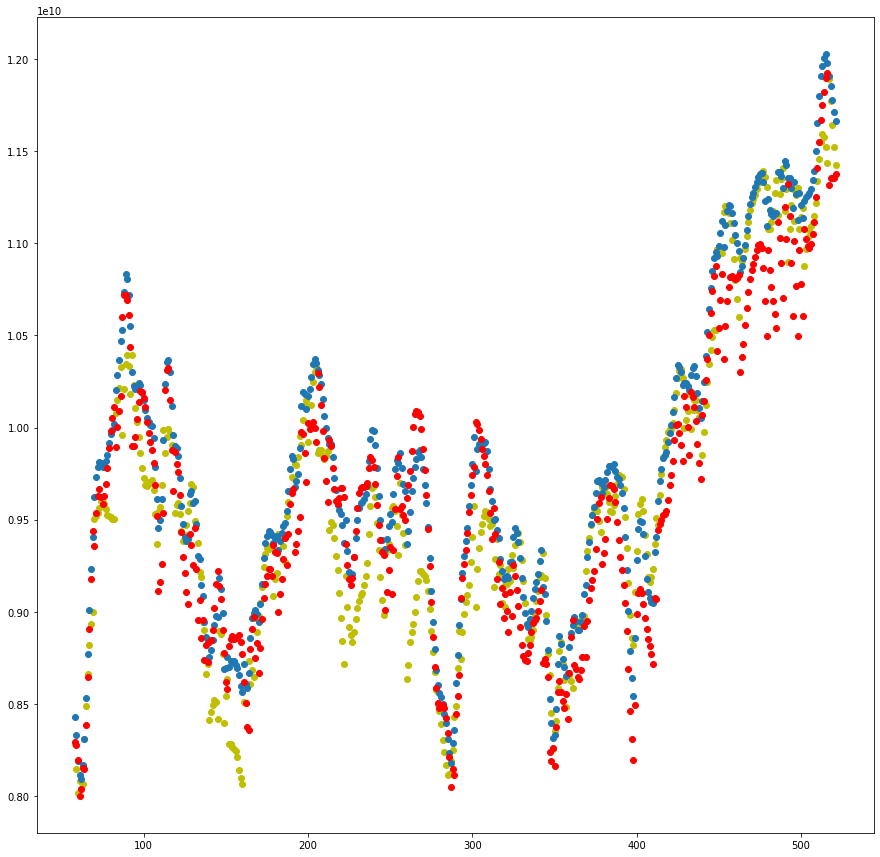

In [206]:
plt.scatter(x, all_data_l1[x,y-1], color='y')
plt.scatter(x, all_data_l1[x,y])
plt.scatter(x, all_data_l1[x,y+1], color='red')

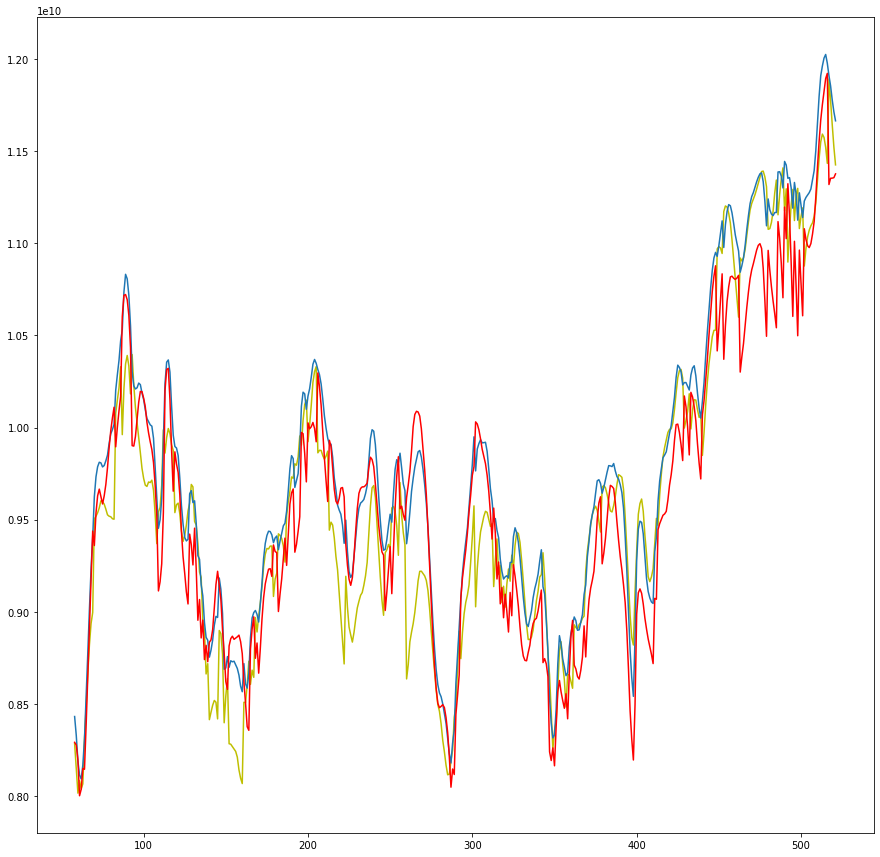

In [205]:
plt.plot(x, all_data_l1[x,y-1], color='y')
plt.plot(x, all_data_l1[x,y])
plt.plot(x, all_data_l1[x,y+1], color='red')

In [209]:
l1_horizons_train.hor_2.mean().astype(int)

823

In [212]:
y_hat = np.zeros_like(l1_horizons_train.hor_1) + l1_horizons_train.hor_2.mean().astype(int)

In [224]:
y_hat

array([823., 823., 823., ..., 823., 823., 823.])

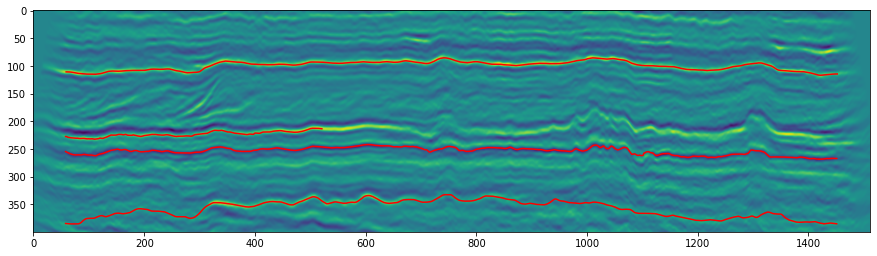

In [218]:
plt.imshow(all_data_l1.T[600:1000])
plt.plot(l1_horizons_train.hor_1-600, color='red')
plt.plot(l1_horizons_train.hor_2-600, color='red')
# plt.plot(y_hat-600, color='black')
plt.plot(l1_horizons_train.hor_3-600, color='red')
plt.plot(l1_horizons_train.hor_4-600, color='red')

In [306]:
mid_point = 5 // 2
mid_point

2

In [307]:
[i for i in range(-mid_point, mid_point + 1)]

[-2, -1, 0, 1, 2]

In [430]:
all_data_l1.T[[1+700,2,3], [100,2,3]]

array([5.99434e+08, 0.00000e+00, 0.00000e+00], dtype=float32)

In [436]:
start_idx = 60
end_idx = 1442
tmp = l1_horizons_train.loc[start_idx:end_idx].copy()
y_hat2 = np.zeros_like(tmp.x.values)

y_prev = l1_horizons_train.loc[start_idx-1, 'hor_1']
y_prev = int(y_prev)
print(y_prev)

N_neighbours = 3
for i, x in enumerate(tmp.x):
    mid_point = N_neighbours // 2
    neighbours = np.array([all_data_l1.T[y_prev+j, x] for j in range(-mid_point, mid_point + 1)])
    
    assert N_neighbours == len(neighbours)
                          
    upd = np.argmax(neighbours)
    y_prev += (upd - mid_point)
    y_hat2[i] = y_prev

710


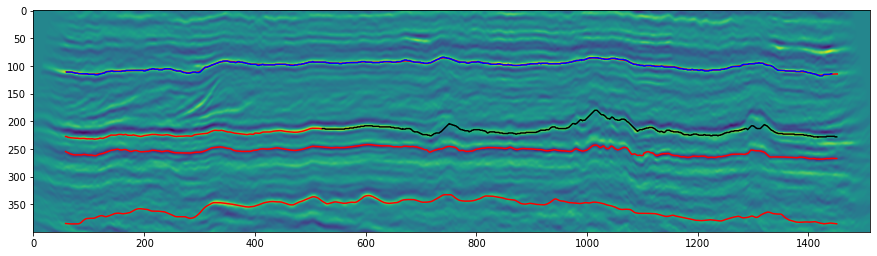

In [437]:
plt.imshow(all_data_l1.T[600:1000])
plt.plot(l1_horizons_train.hor_1-600, color='red')
plt.plot(l1_horizons_train.hor_2-600, color='red')
plt.plot(my_submission.x.values, y_hat-600, color='black')
plt.plot(tmp.x.values, y_hat2-600, color='blue')
plt.plot(l1_horizons_train.hor_3-600, color='red')
plt.plot(l1_horizons_train.hor_4-600, color='red')

In [446]:
def F(x, y, y_hat, heights):
    z = heights.T[y, x]
    z_hat = heights.T[y_hat, x]
    y = y / 3000
    y_hat = y_hat / 3000
    z = z / heights.max()
    z_hat = z_hat / heights.max()
    f = (y - y_hat)**2 + (z - z_hat)**2
    return f.sum() ** 1/2

In [447]:
F(tmp.x.values, tmp.hor_1.values.astype(int), y_hat2, all_data_l1)

0.24491214560013386

In [400]:
my_submission.y = y_hat2

In [401]:
my_submission.to_csv("my_submission2.csv", index=False)

In [284]:
int(0.6)

0